In [1]:
#mathematical operations on arrays
import numpy as np 
#to analyze data
import pandas as pd 
import matplotlib.pyplot as plt
#Seaborn to visualize the data and make it more and more undertakable by the user
import seaborn as sns
#Le package sklearn datasets intègre quelques petits ensembles de données
from sklearn import datasets
from sklearn.cluster import KMeans
import random

In [2]:
class KMeansClass():
    def __init__(self, k=3, max_iterations=500):
        self.k = k
        self.max_iterations = max_iterations
        self.kmeans_centroids = []

    # Initialiser les centroïdes en tant qu'échantillons aléatoires
    def _init_random_centroids(self, data):
        #samples=échantillons   features=caractéristiques
        n_samples, n_features = np.shape(data)
        #Python numpy. zeros() function returns a new array of given shape and type
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = data[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids
    
    # Calculer la distance entre deux points
    def euclidean_distance(self,pnt1, pnt2):
        if(len(pnt1) != len(pnt2)):
            raise Exception("Les deux points n'ont pas la même longueur")
            
        distance = 0
        for i in range(len(pnt1)):
            distance += pow((pnt1[i] - pnt2[i]), 2)
            
        return np.sqrt(distance)
    
    # Renvoie l'indice du centroïde le plus proche de l'échantillon
    def _closest_centroid(self, sample, centroids):
        closest_i = None
        #inicialiser closest_distance par valeur supérieure illimitée pour la comparaison
        closest_distance = float("inf")
        for i, centroid in enumerate(centroids):
            distance =  self.euclidean_distance(sample, centroid)
            if distance < closest_distance:
                closest_i = i
                closest_distance = distance
        return closest_i

    # Attribuez les échantillons aux centroïdes les plus proches pour créer des clusters
    def _create_clusters(self, centroids, data):
        #n_samples=nbr échantillons
        n_samples = np.shape(data)[0]
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(data):		
            centroid_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters

    # Calculer de nouveaux centroïdes comme moyennes des échantillons dans chaque cluster
    def _calculate_centroids(self, clusters, data):
        n_features = np.shape(data)[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            #Calculer la moyenne arithmétique le long de l'axe 0
            centroid = np.mean(data[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    # Classer les échantillons par l'indice de leurs clusters
    def _get_cluster_labels(self, clusters, data):
        # Une prédiction pour chaque échantillon
        y_pred = np.zeros(np.shape(data)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

    # Effectuez un clustering K-Means et renvoyez les centroïdes des clusters
    def fit(self, data):
        # 1-Initialiser les centroïdes
        centroids = self._init_random_centroids(data)

        # Itérer jusqu'à convergence c.à.d pas de changement des centres
        for _ in range(self.max_iterations):
            # 2-Affecter des échantillons aux centroïdes les plus proches c.à.d créer des clusters
            clusters = self._create_clusters(centroids, data)

            prev_centroids = centroids
            # 3-Calculer de nouveaux centroïdes à partir des clusters
            centroids = self._calculate_centroids(clusters, data)

            # Si aucun barycentre n'a changé => Critère d'arret
            diff = centroids - prev_centroids
            if not diff.any():
                break

        self.kmeans_centroids = centroids
        return centroids

    # Prédire la classe d'un échantillon
    def predict(self, data):

        # Vérifiez d'abord si nous avons déterminé les centroïdes K-Means
        if not self.kmeans_centroids.any():
            raise Exception("K-Means centroids have not yet been determined")

        clusters = self._create_clusters(self.kmeans_centroids, data)

        predicted_labels = self._get_cluster_labels(clusters, data)

        return predicted_labels
    def predictIrisClass(self, centroids,sample):
        predicted_cluster=self._closest_centroid(sample, centroids)
        return predicted_cluster


In [3]:
# Import the Iris flower dataset
iris = datasets.load_iris()
print("Dataset loaded successfully")

Dataset loaded successfully


In [4]:
#Creating data frame 
Data = pd.DataFrame(iris.data, columns = iris.feature_names)
#Top values of Dataset
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
Data.shape

(150, 4)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


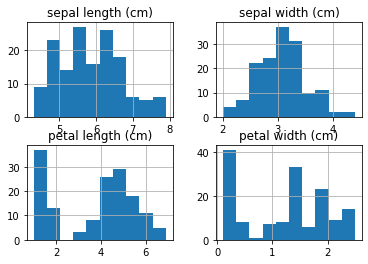

In [7]:
Data.hist()
plt.show()

C:\Users\AMINA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AMINA\AppData\Local\Temp/ipykernel_3720/1567590089.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, 8), inertias, 'bx-', color='red')


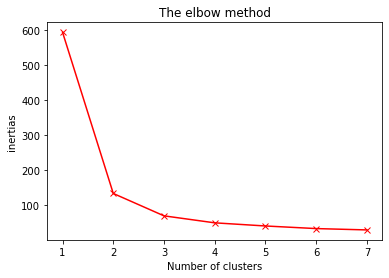

In [8]:
#Trouver des nombres de clusters pour Kmeans
x=Data.iloc[:,0:3].values
inertias=[]

# Trouver l'inertie sur diverses valeurs de k
for i in range(1,8):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0).fit(x)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1, 8), inertias, 'bx-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertias') 
plt.show()

In [9]:
any([0, 0, 0, 0])

False

In [10]:
#Application du classificateur KMeans
train_data = np.array(iris.data)

In [11]:
clf = KMeansClass(k=3, max_iterations=200)
#centroids = clf.fit(train_data)

In [12]:
centroids = clf.fit(train_data)

In [13]:
centroids
     

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [14]:
predicted_labels = clf.predict(train_data)

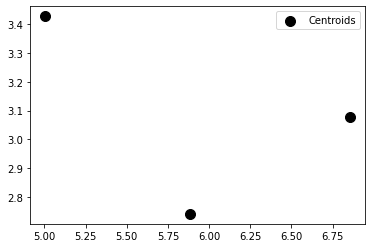

In [15]:
# Plotting the centroids of the clusters
plt.scatter(centroids[:, 0],centroids[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

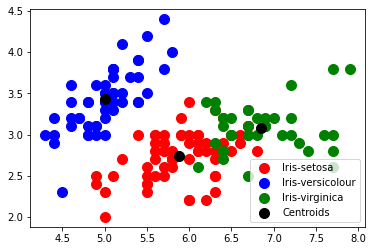

In [16]:
# Visualising the clusters - On the first two columns
plt.scatter(x[predicted_labels == 0, 0], x[predicted_labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predicted_labels == 1, 0], x[predicted_labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predicted_labels == 2, 0], x[predicted_labels == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(centroids[:, 0],centroids[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

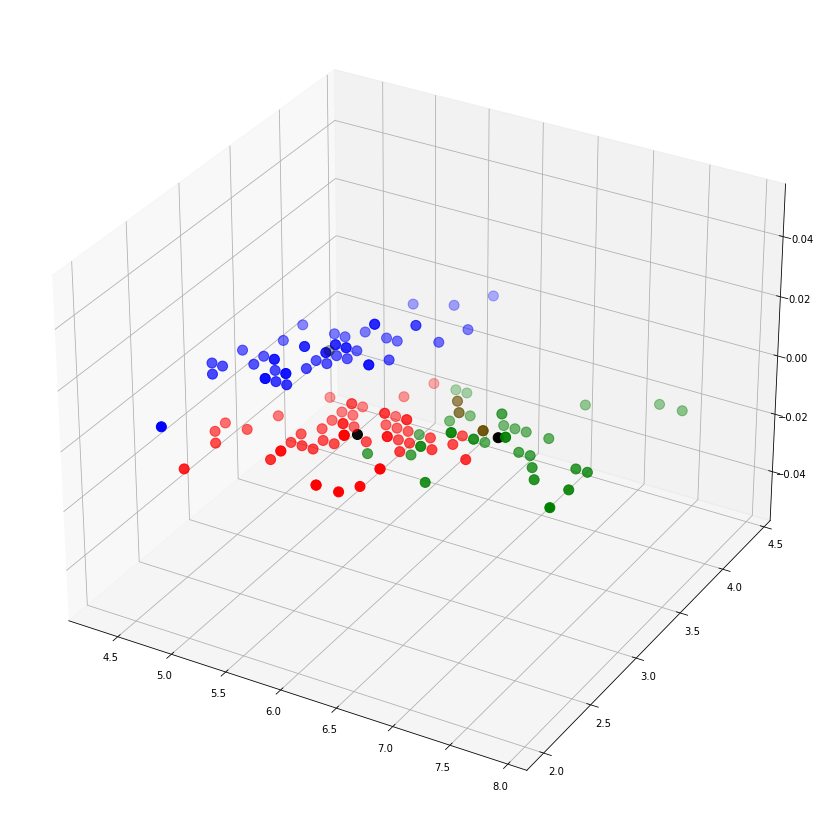

In [17]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[predicted_labels == 0, 0], x[predicted_labels == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predicted_labels == 1, 0], x[predicted_labels == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predicted_labels == 2, 0], x[predicted_labels == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:,1], s = 100, c = 'black', label = 'Centroids')
plt.show()

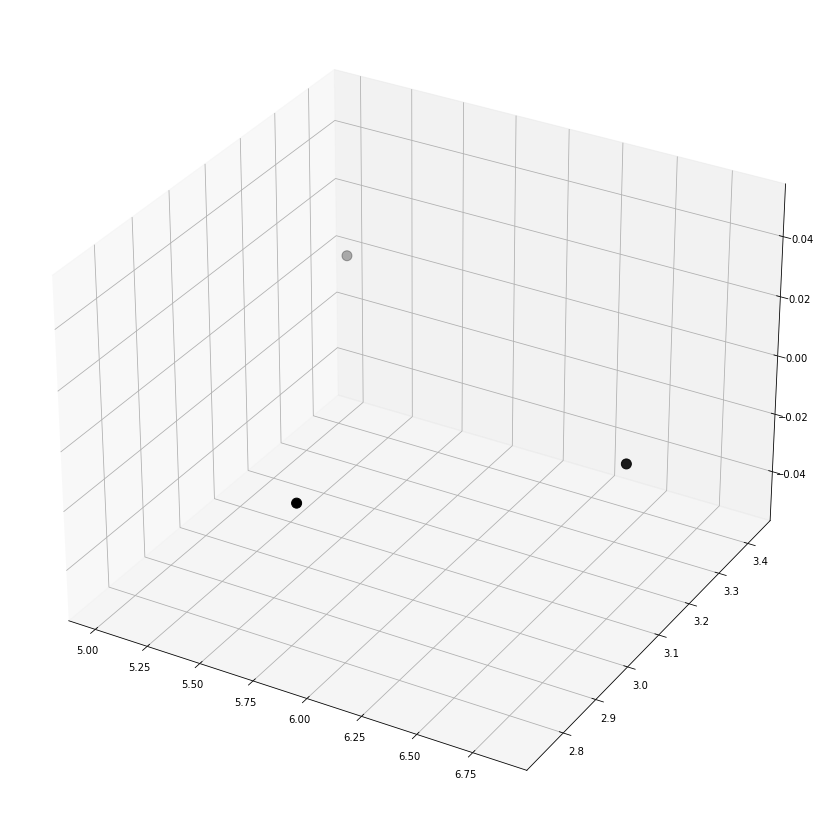

In [18]:
#Plotting the centroids of the clusters
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(centroids[:, 0], centroids[:,1], s = 100, c = 'black', label = 'Centroids')
plt.show()

In [19]:
info=[6.006     , 4.428     , 3.462     , 1.246   ]
prevision=clf.predictIrisClass(centroids,info)

In [20]:
print("Prevision de type pour cette Iris est dans le cluster:",prevision)

Prevision de type pour cette Iris est dans le cluster: 0
